In [1]:
# for data manipulation
import pandas as pd
import numpy as np

#for graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#models to run
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelBinarizer
from sklearn.cross_validation import cross_val_score

#train_test_split
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit, GridSearchCV

#metrics
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
from sklearn.metrics import accuracy_score, roc_auc_score

/Users/sourabhrohilla/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Objective of sprint 1 (~30 minutes) :
1. Read csv file.
2. Look at the shape of dataframe.
3. Clean label.
4. Check for duplicates and remove duplicates.
5. A bar plot of distribution of labels, i.e. attack-types using ```sns.countplot```
6. Convert labels into binary labels. Normal and attack.
7. A bar plot of distribution of binary labels (normal and attacks)
8. Distribution of features
    1. Categorical features : Use ```sns.countplot``` to understand prominent values of a feature in attack vs normal.
    2. Continuous features : Use ```sns.boxplot``` to understand distribution of a feature in attack vs normal.

In [12]:
# read raw data
raw_data = pd.read_csv('/Users/sourabhrohilla/Downloads/session_1_data_train.csv')

In [13]:
test_data = pd.read_csv('/Users/sourabhrohilla/Downloads/session_1_data_test.csv')
test_data.columns = raw_data.columns

In [14]:
raw_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [15]:
raw_data.label.value_counts().keys()

Index([u'smurf.', u'neptune.', u'normal.', u'back.', u'satan.', u'ipsweep.',
       u'portsweep.', u'warezclient.', u'teardrop.', u'pod.', u'nmap.',
       u'guess_passwd.', u'buffer_overflow.', u'land.', u'warezmaster.',
       u'imap.', u'rootkit.', u'loadmodule.', u'ftp_write.', u'multihop.',
       u'phf.', u'perl.', u'spy.'],
      dtype='object')

In [16]:
test_data.label.value_counts().keys()

Index([u'smurf.', u'normal.', u'neptune.', u'snmpgetattack.', u'mailbomb.',
       u'guess_passwd.', u'snmpguess.', u'satan.', u'warezmaster.', u'back.',
       u'mscan.', u'apache2.', u'processtable.', u'saint.', u'portsweep.',
       u'ipsweep.', u'httptunnel.', u'pod.', u'nmap.', u'buffer_overflow.',
       u'multihop.', u'named.', u'sendmail.', u'ps.', u'xterm.', u'rootkit.',
       u'teardrop.', u'xlock.', u'land.', u'xsnoop.', u'ftp_write.',
       u'sqlattack.', u'loadmodule.', u'worm.', u'perl.', u'phf.',
       u'udpstorm.', u'imap.'],
      dtype='object')

In [17]:
# remove ". " from labels
raw_data['label'] = raw_data['label'].apply(lambda x: x[:-1])
test_data['label'] = test_data['label'].apply(lambda x: x[:-1])

In [18]:
pd.isnull(raw_data).sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [19]:
raw_data = raw_data.drop_duplicates()
raw_data = raw_data.dropna()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

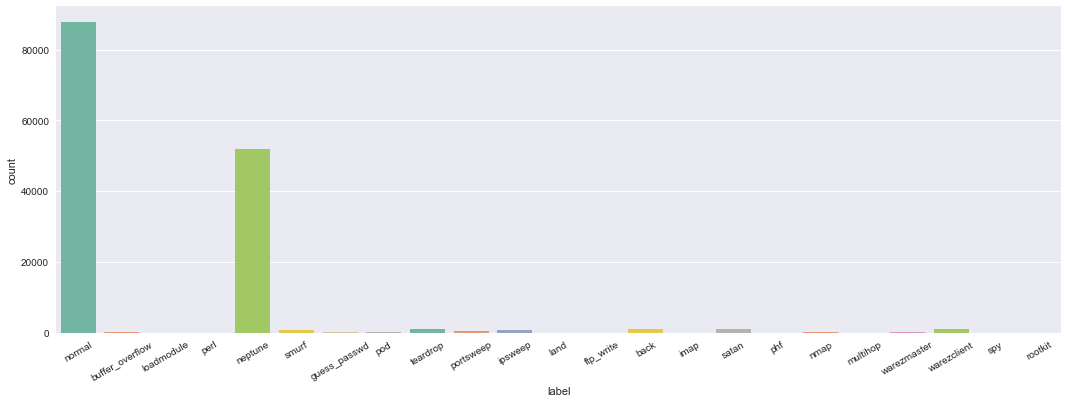

In [20]:
# distribution of labels
sns.set_color_codes()

fig, ax1 = plt.subplots(1,1, figsize = (18,6))

sns.countplot('label', data = raw_data,palette="Set2", ax = ax1)
plt.xticks(rotation=30)

In [21]:
# combining labels as normal and attack
# normal is 1 , attack is 0

def get_label_grouping(label):
    if label == 'normal':
        return 'normal'
    else:
        return 'attack'

raw_data['label_attack_type']= raw_data['label'].apply(get_label_grouping)
test_data['label_attack_type']= test_data['label'].apply(get_label_grouping)

In [22]:
raw_data['label_attack_type'].value_counts()

normal    87831
attack    57754
Name: label_attack_type, dtype: int64

In [23]:
test_data['label_attack_type'].value_counts()

attack    250436
normal     60592
Name: label_attack_type, dtype: int64

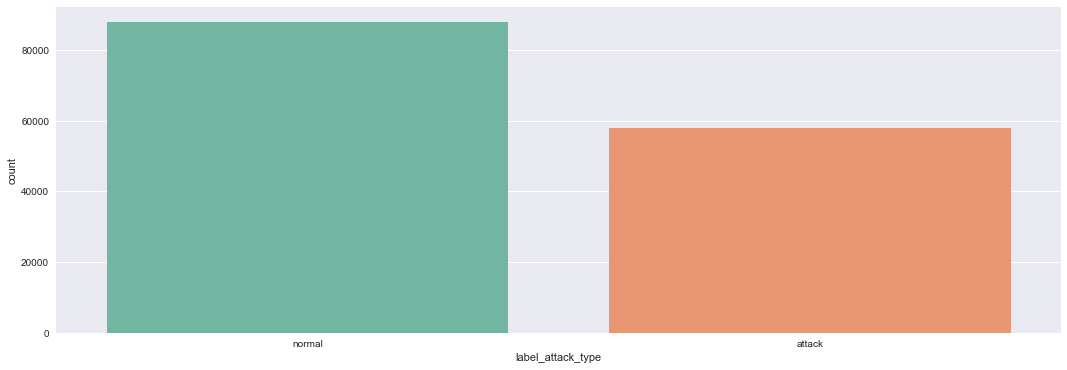

In [24]:
# distribution of label_attack_type

fig, ax1 = plt.subplots(1,1, figsize = (18,6))

sns.countplot('label_attack_type', data = raw_data,palette="Set2", ax = ax1)
# plt.xticks(rotation=30)

In [25]:
raw_data.columns

Index([u'duration', u'protocol_type', u'service', u'flag', u'src_bytes',
       u'dst_bytes', u'land', u'wrong_fragment', u'urgent', u'hot',
       u'num_failed_logins', u'logged_in', u'num_compromised', u'root_shell',
       u'su_attempted', u'num_root', u'num_file_creations', u'num_shells',
       u'num_access_files', u'num_outbound_cmds', u'is_host_login',
       u'is_guest_login', u'count', u'srv_count', u'serror_rate',
       u'srv_serror_rate', u'rerror_rate', u'srv_rerror_rate',
       u'same_srv_rate', u'diff_srv_rate', u'srv_diff_host_rate',
       u'dst_host_count', u'dst_host_srv_count', u'dst_host_same_srv_rate',
       u'dst_host_diff_srv_rate', u'dst_host_same_src_port_rate',
       u'dst_host_srv_diff_host_rate', u'dst_host_serror_rate',
       u'dst_host_srv_serror_rate', u'dst_host_rerror_rate',
       u'dst_host_srv_rerror_rate', u'label', u'label_attack_type'],
      dtype='object')

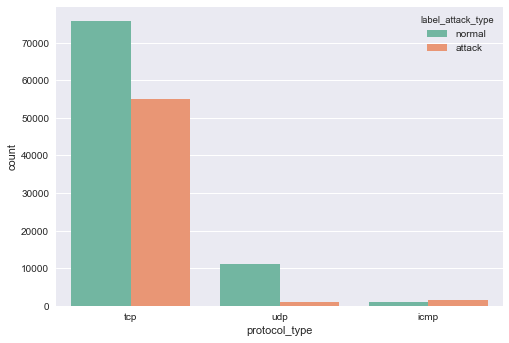

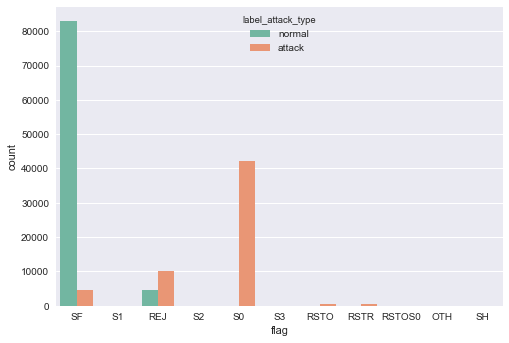

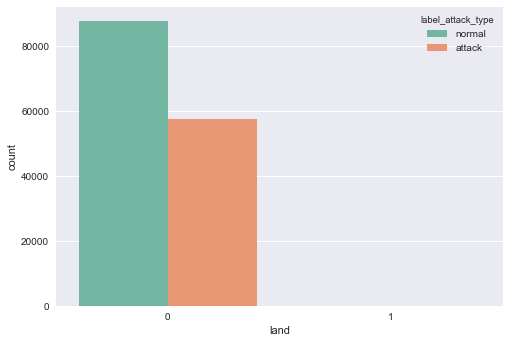

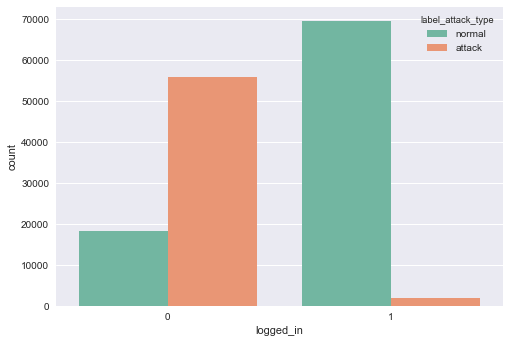

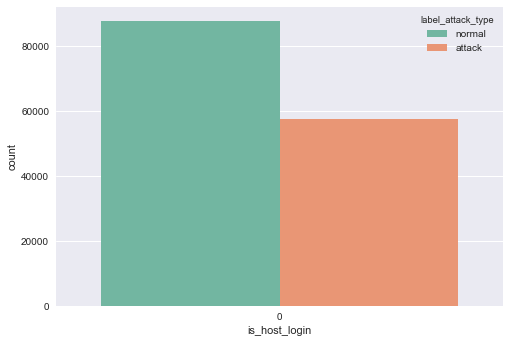

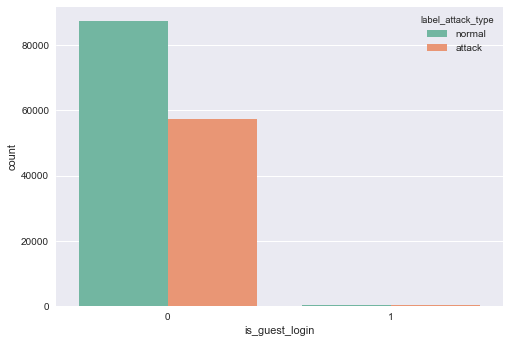

In [26]:
# distribution of categorical variables with 'label_attack_type'

sns.set()

categorical_cols = ['protocol_type','flag','land','logged_in','is_host_login','is_guest_login']

for column in categorical_cols:
    plt.figure()
    sns.countplot(x=column, hue="label_attack_type",data=raw_data, palette="Set2")

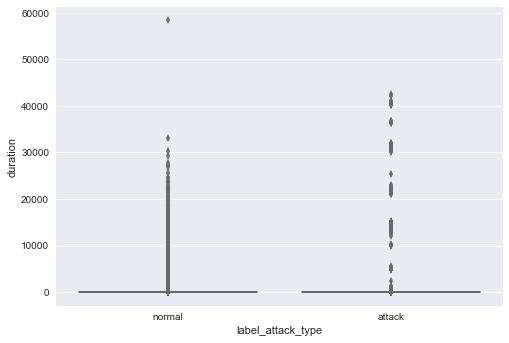

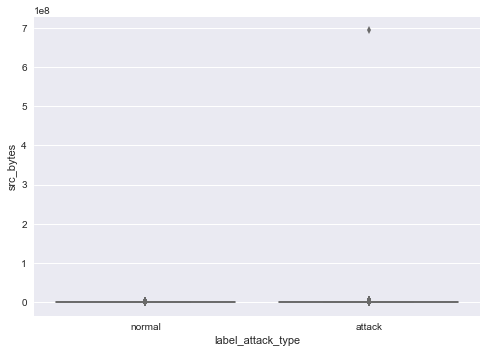

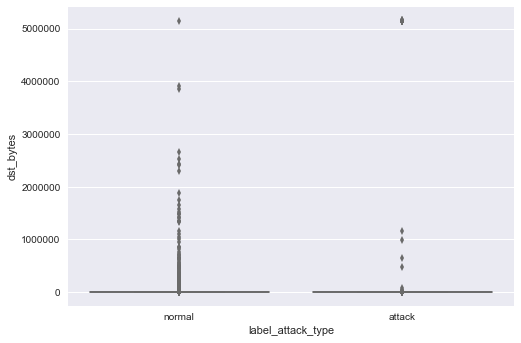

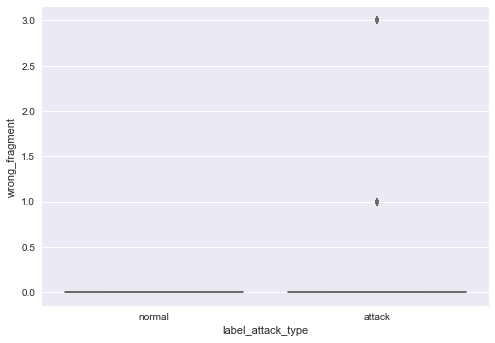

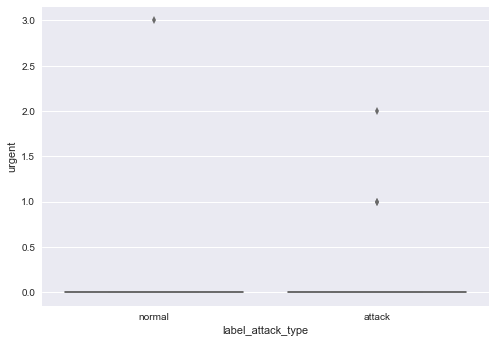

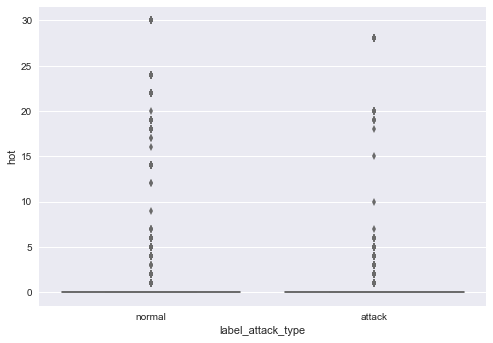

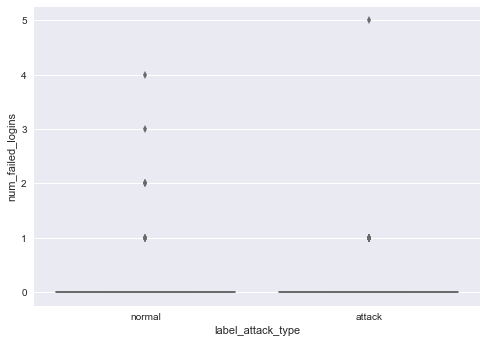

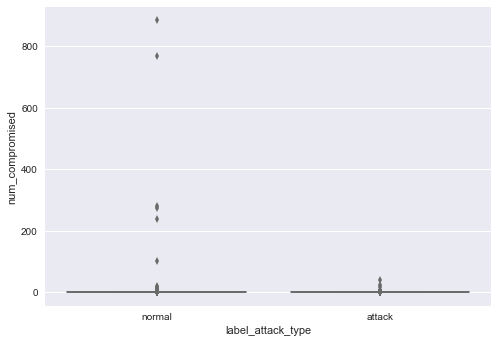

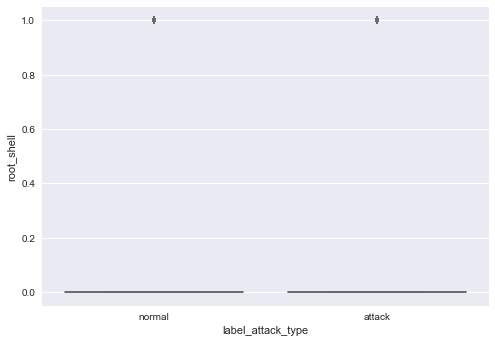

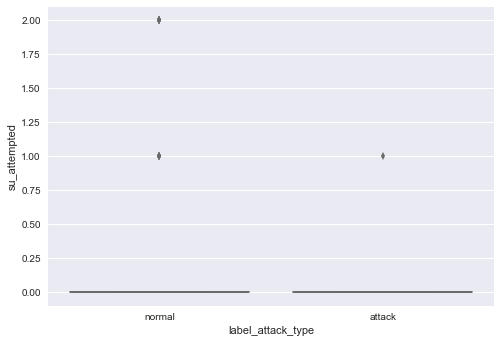

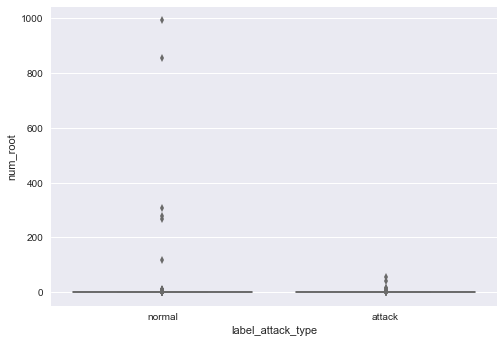

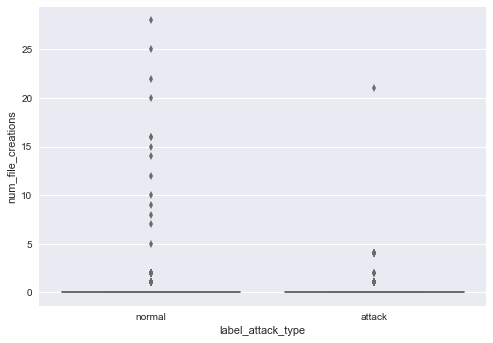

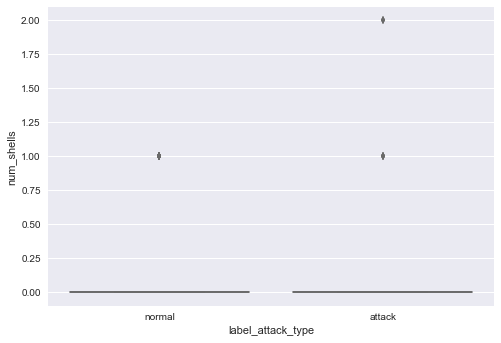

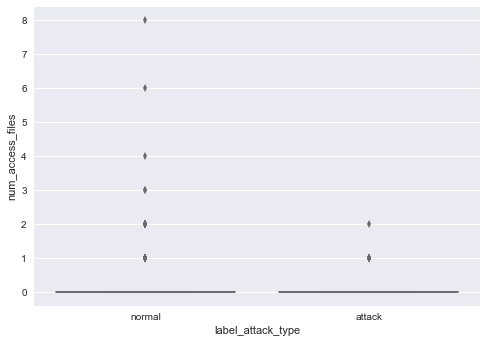

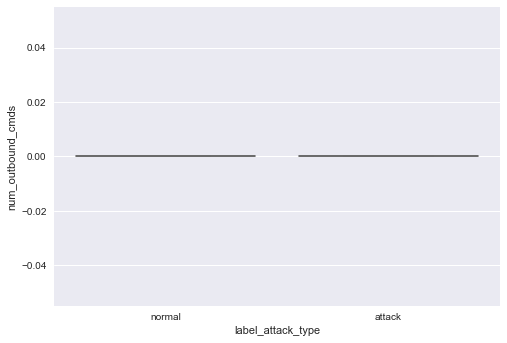

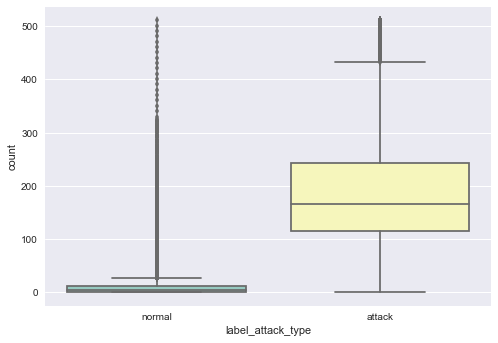

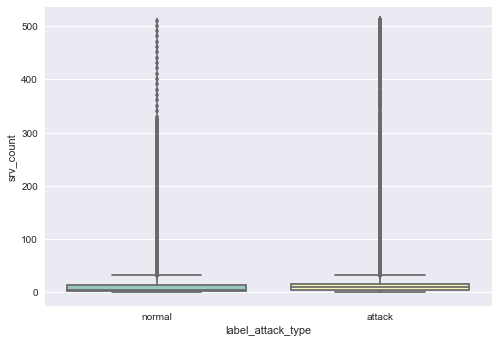

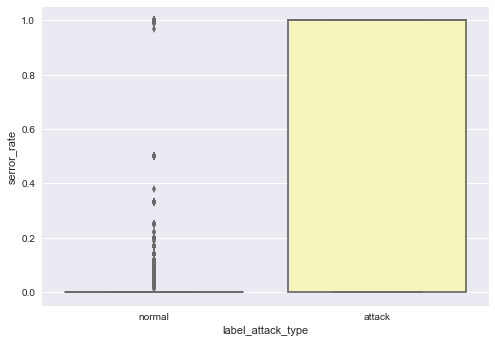

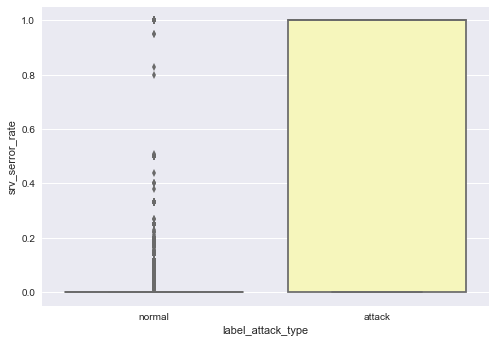

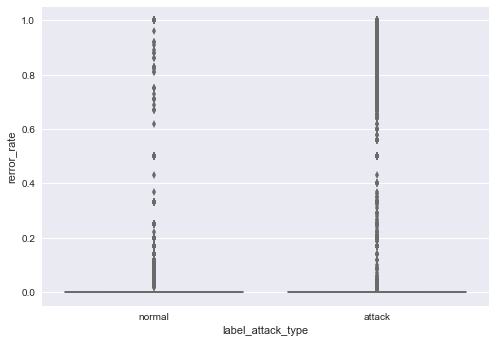

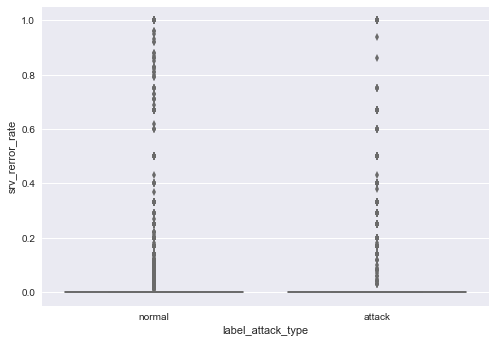

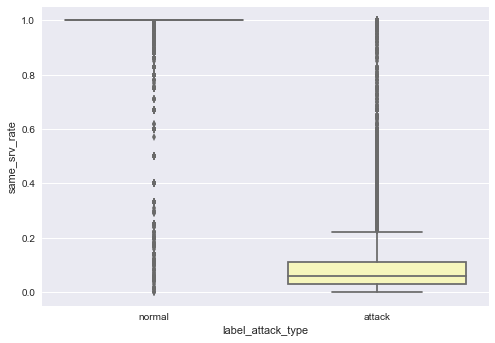

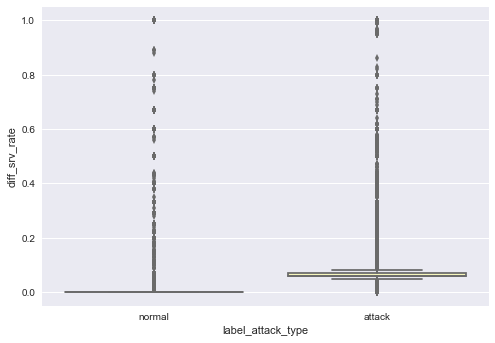

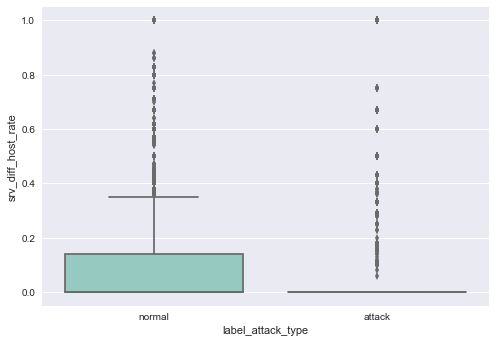

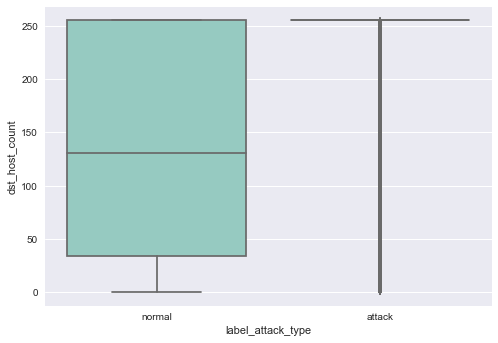

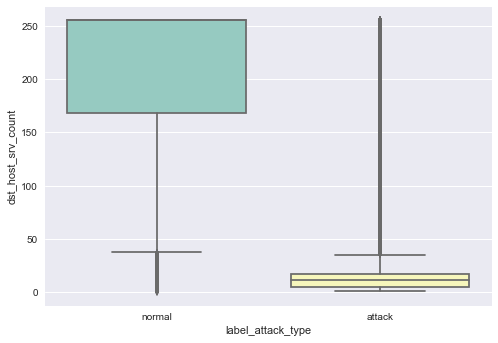

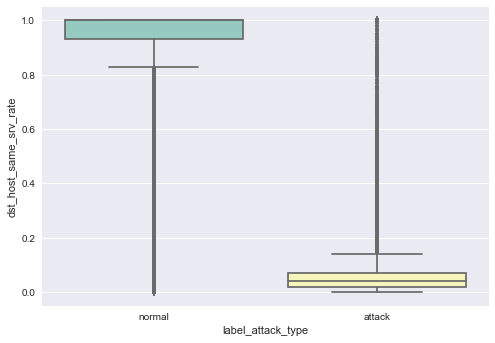

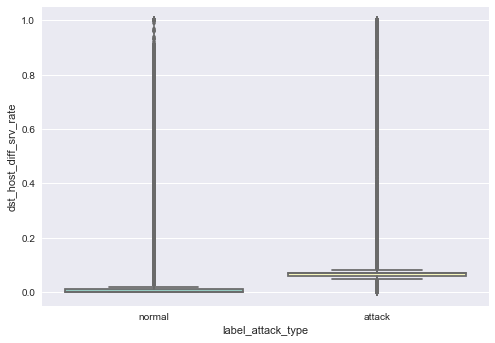

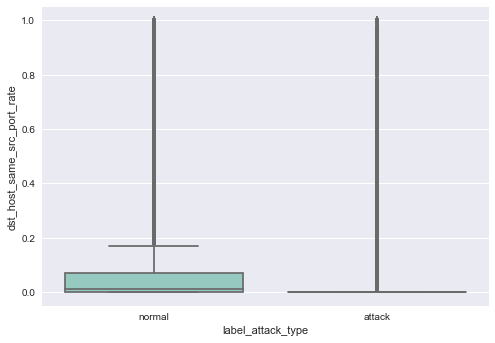

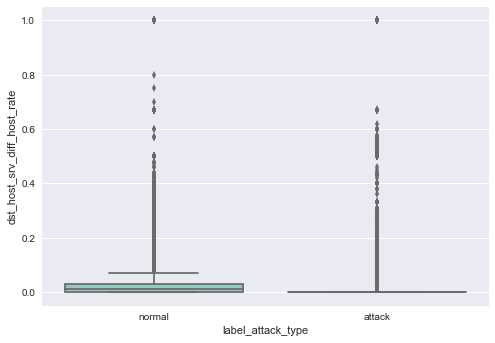

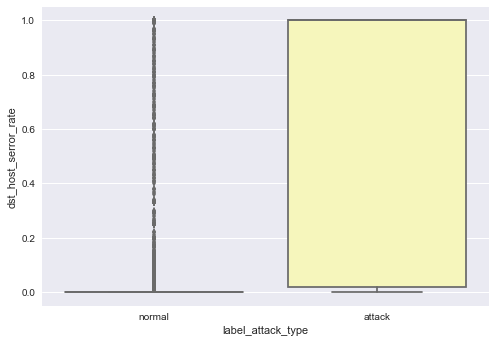

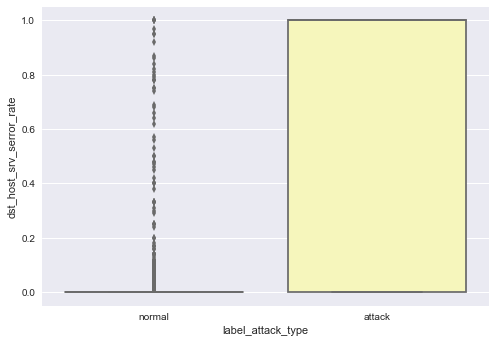

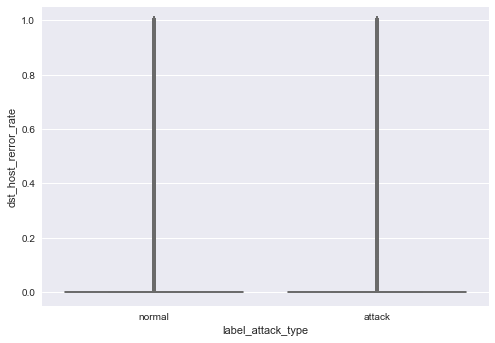

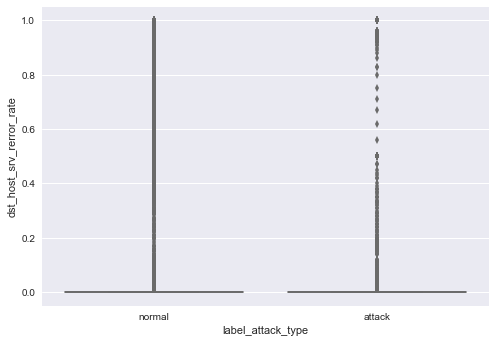

In [31]:
## Checking distributions of continuous variables with default_status by plotting boxplots
for column in raw_data.columns:
    if column not in categorical_cols+['index','service','label','label_attack_type']:
        plt.figure()
        sns.boxplot(x="label_attack_type", y=column,data=raw_data , palette = "Set3")

Outcomes of sprint 1 : 
1. service columns has lots of different values. Need to find a way to colnsolidate distinct distinct classes. Proceeding without services column for now.
2. is_host_login always has a value of 0. So, drop the column.

### Objective of sprint 2 (~30 minutes):
1. Convert data labels to 0/1.
3. One-hot encoding of categorical features i.e. flag and protocol_type.
4. Stratified sampling. Use ```train_test_split```. Keep a 70-30 split in training-testing data split.
5. Write evaluation function to calculate accuracy, precision, recall, roc_auc_curve, confusion matrix. Call it ```get_performance_metrics(y_test, model_predictions)```

In [32]:
# converting label_attack_type to 0 and 1
raw_data.loc[raw_data['label_attack_type'] == 'normal', 'final_label'] = 0
raw_data.loc[raw_data['label_attack_type'] == 'attack', 'final_label'] = 1

In [33]:
# converting label_attack_type to 0 and 1
test_data.loc[test_data['label_attack_type'] == 'normal', 'final_label'] = 0
test_data.loc[test_data['label_attack_type'] == 'attack', 'final_label'] = 1

In [34]:
#one hot encoding of categorical variables

flag_encoding_raw = pd.get_dummies(raw_data['flag'],prefix = 'flag')
protocol_encoding_raw = pd.get_dummies(raw_data['protocol_type'],prefix = 'protocol')

# concat with blm dataframe

raw_data = pd.concat([raw_data, flag_encoding_raw,protocol_encoding_raw], axis =1 )

In [35]:
#one hot encoding of categorical variables

flag_encoding_test = pd.get_dummies(test_data['flag'],prefix = 'flag')
protocol_encoding_test = pd.get_dummies(test_data['protocol_type'],prefix = 'protocol')

# concat with blm dataframe

test_data = pd.concat([test_data, flag_encoding_test,protocol_encoding_test], axis =1 )

### Train test split

In [36]:
predictors = [c for c in raw_data.columns if c not in ['label', 'label_attack_type', 'index', 'protocol_type',
                                                   'flag','service','is_host_login','final_label']]

X_train = raw_data[predictors]
y_train = raw_data['final_label']
X_test = test_data[predictors]
y_test = test_data['final_label']

In [500]:
# X_train, X_test, y_train, y_test = train_test_split(test_data[predictors], test_data['final_label'], 
#                                                     test_size=0.30, random_state=3, stratify = test_data['final_label'])

In [37]:
print(y_test.value_counts())

1.0    250436
0.0     60592
Name: final_label, dtype: int64


In [38]:
print(y_train.value_counts())

0.0    87831
1.0    57754
Name: final_label, dtype: int64


### Evaluation function   
Metrics - Accuracy, precision, recall, F1 score, Confusion matrix, roc_auc 

In [39]:
def get_performance_metrics(y_test,model_predictions):
    # Accuracy
    model_accuracy = accuracy_score(y_test,model_predictions)
    print("Accuracy is ", model_accuracy)

    # precision, recall, f1 score
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_test,model_predictions)
    print('Precision for each class is ', model_precision)
    print('Recall/sensitivity for each class is ', model_recall)
    print('F1 Score for each class is ', model_f1)

    # roc_auc
    model_roc_auc = roc_auc_score(y_test,model_predictions)
    print('AUC-ROC score is ', model_roc_auc)

    # confusion matrix
    model_confusion_matrix = confusion_matrix(y_test,model_predictions)
    print('confusion matrix is :-->')
    print(model_confusion_matrix)

### Objective of Sprint 3: 
1. Fit different models and calculate performance metrics.
2. Use Naive Bayes, Logistic Regression.
3. Hyperparameter tuning of Logistic Regression using GridSearchCV.
3. Use tree based classifiers. DecisionTreeClassifier, RandomForestClassifier.

### Naive Bayes

In [40]:
# create instance of Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB(priors=None)

In [41]:
#making predictions
nb_predictions = nb_model.predict(X_test)

In [42]:
get_performance_metrics(y_test,nb_predictions)

('Accuracy is ', 0.71100994122715644)
('Precision for each class is ', array([ 0.40168754,  0.99536574]))
('Recall/sensitivity for each class is ', array([ 0.98760562,  0.64408871]))
('F1 Score for each class is ', array([ 0.57109455,  0.78209411]))
('AUC-ROC score is ', 0.81584716689794079)
confusion matrix is :-->
[[ 59841    751]
 [ 89133 161303]]


### Logistic Regression

In [43]:
# create instance of logistic model
lr_model = LogisticRegression(random_state = 3)
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=3, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
# predictions
lr_predictions = lr_model.predict(X_test)

In [45]:
get_performance_metrics(y_test,lr_predictions)

('Accuracy is ', 0.81034183417570127)
('Precision for each class is ', array([ 0.50691324,  0.99066077]))
('Recall/sensitivity for each class is ', array([ 0.96993002,  0.7717301 ]))
('F1 Score for each class is ', array([ 0.66583961,  0.86759725]))
('AUC-ROC score is ', 0.87083006323320156)
confusion matrix is :-->
[[ 58770   1822]
 [ 57167 193269]]


### Support Vector Machine

In [46]:
svc_model = SVC()

In [ ]:
svc_model.fit(X_train,y_train)

In [ ]:
svc_predictions = svc_model.predict(X_test)
get_performance_metrics(y_test,svc_predictions)

#### Hyperparameter tuning - using GridSearchCV for Logistic Regression

In [495]:
# choose set of parameters to tune
params = {  'C' : [0.001, 0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'], 
            'fit_intercept': [True, False]}

# create instance of GridSearch and fit the data
grid = GridSearchCV(estimator = lr_model, param_grid = params)
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [468]:
# evaluate the best grid searched model on the testing data
grid_search_accuracy = grid.score(X_test, y_test)
print('Grid Search Accuracy is {0}'.format(grid_search_accuracy))
print("grid search best parameters: {}".format(grid.best_params_))

Grid Search Accuracy is 0.908825089596
grid search best parameters: {'penalty': 'l1', 'C': 0.001, 'fit_intercept': True}


### Decision Tree

In [503]:
#create instance of decision tree
dt_model = DecisionTreeClassifier(random_state = 3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3,
            splitter='best')

In [504]:
# predictions
dt_predictions = dt_model.predict(X_test)

In [505]:
get_performance_metrics(y_test,dt_predictions)

('Accuracy is ', 0.99361738830429536)
('Precision for each class is ', array([ 0.99512738,  0.99115847]))
('Recall/sensitivity for each class is ', array([ 0.99457354,  0.99205809]))
('F1 Score for each class is ', array([ 0.99485038,  0.99160807]))
('AUC-ROC score is ', 0.99331581247676071)
confusion matrix is :-->
[[14296    78]
 [   70  8744]]


### Random Forest Model

In [506]:
#create instance of random forest model
rf_model = RandomForestClassifier(n_estimators=500,n_jobs = -1, random_state=3)

In [507]:
# fitting data to random forest model
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

In [508]:
# predictions
rf_predictions = rf_model.predict(X_test)

In [509]:
get_performance_metrics(y_test,rf_predictions)

('Accuracy is ', 0.99495428670001729)
('Precision for each class is ', array([ 0.99596466,  0.99330686]))
('Recall/sensitivity for each class is ', array([ 0.99589537,  0.99341956]))
('F1 Score for each class is ', array([ 0.99593001,  0.99336321]))
('AUC-ROC score is ', 0.99465746321272086)
confusion matrix is :-->
[[14315    59]
 [   58  8756]]


### Objective of Sprint 4: 
1. Adjust the misclassification cost in Random Forest classifier.
2. Adjust the decision threshold. Run a cross-validation procedure (e.g. 10-fold cross validation) to get a distribution of accuracies for each decision threshold (0.1,0.2,0.3,.....,0.9). Select the threshold with highest accuracy.

### Addressing Imbalance data at algorithm level

#### 1. Adjust the class weight (misclassification costs) for Random Forest

In [479]:
# Class weights can be cutomized in this format: class_weight={0: 100,1: 1} 
# Class weights can be given 'balanced': class_weight= 'balanced'

rf_model = RandomForestClassifier(n_estimators=500,n_jobs = -1, random_state=3, class_weight={0: 100,1: 1})
rf_model.fit(X_train,y_train)
rf_predictions = rf_model.predict(X_test)

In [480]:
get_performance_metrics(y_test,rf_predictions)

('Accuracy is ', 0.93748301872145523)
('Precision for each class is ', array([ 0.91818905,  0.97602979]))
('Recall/sensitivity for each class is ', array([ 0.98710162,  0.85655933]))
('F1 Score for each class is ', array([ 0.95139909,  0.91240029]))
('AUC-ROC score is ', 0.92183047590013967)
confusion matrix is :-->
[[47295   618]
 [ 4214 25164]]


### Adjust the decision threshold

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8


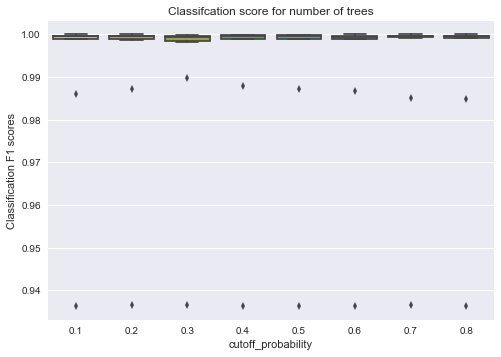

In [482]:
## Adjust the decision threshold of default value of 0.5 
## Finding threshold cutoff probability value 

def predict_label_given_cutoff(model,X_train,cutoff_prob):
    return (model.predict_proba(X_train)[:,1]>cutoff_prob)

scores = []
cutoff_prob_list = []

def get_f1_for_given_cutoff(clf,X_train,y_train,cutoff_prob):
    y_predict = predict_label_given_cutoff(clf_rf,X_train,cutoff_prob)
    return sklearn.metric.f1_score(y_train,y_predict)

rf_model = RandomForestClassifier(n_estimators= 50,n_jobs = -1)
for cutoff_prob in np.arange(0.1,0.9,0.1):
    validated = cross_val_score(rf_model,X_train,y_train, cv=10, scoring =f1_for_given_cutoff(cutoff_prob))
    scores.append(validated)
    cutoff_prob_list.append(cutoff_prob)
    print(cutoff_prob)
    
sns.boxplot(cutoff_prob_list,scores)
plt.xlabel('cutoff_probability')
plt.ylabel('Classification F1 scores')
plt.title('Classifcation score for number of trees')
plt.show()

In [53]:
## Observed cutoff_prob from above graph 
cutoff_prob = 0.1

## Model 
rf_model = RandomForestClassifier(n_estimators= 50,n_jobs = -1)
rf_model.fit(X_train,y_train)

# predictions, for given cutoff prob value
rf_predictions = predict_label_given_cutoff(rf_model,X_test,cutoff_prob)

In [54]:
get_performance_metrics(y_test,rf_predictions)

('Accuracy is ', 0.99812253869401957)
('Precision for each class is ', array([ 1.        ,  0.99528952]))
('Recall/sensitivity for each class is ', array([ 0.99688805,  1.        ]))
('F1 Score for each class is ', array([ 0.9984416,  0.9976392]))
('AUC-ROC score is ', 0.99844402277039856)
confusion matrix is :-->
[[26268    82]
 [    0 17326]]
